In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
# Building Sine wave dataset

x = 0.1*np.arange(1000)
data = np.sin(x)

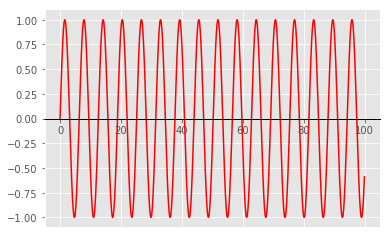

In [3]:
# Ploting cosine wave with generated dataset 

plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [4]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [5]:
data_scaled = data_scaled.flatten()

In [6]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]

In [7]:

# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]

In [8]:
# Preparing the training dataset for LSTM input 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, 1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 1, 20, 1) Y.Shape: (830,)


In [9]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 1, 20, 1) x_test.shape: (166, 1, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [10]:
# Building Model Single input CNN+LSTM

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=5, kernel_size=1, activation='relu'), input_shape=(None, 20, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(44, activation='selu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0730 14:58:30.414008 20796 deprecation_wrapper.py:119] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0730 14:58:30.575579 20796 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3313: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 20, 5)       10        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 10, 5)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 44)                16720     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 45        
Total params: 16,775
Trainable params: 16,775
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(664,1,20,1), y_train, epochs=20, validation_data=(x_test.reshape(166,1,20,1), y_test))

W0730 14:58:39.341055 20796 deprecation_wrapper.py:119] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 664 samples, validate on 166 samples
Epoch 1/20
664/664 [==============================] - 1s 1ms/step - loss: 0.7909 - val_loss: 0.4887
Epoch 2/20
664/664 [==============================] - 0s 147us/step - loss: 0.2814 - val_loss: 0.1041
Epoch 3/20
664/664 [==============================] - 0s 142us/step - loss: 0.0531 - val_loss: 0.0274
Epoch 4/20
664/664 [==============================] - 0s 175us/step - loss: 0.0125 - val_loss: 0.0034
Epoch 5/20
664/664 [==============================] - 0s 165us/step - loss: 0.0016 - val_loss: 8.4087e-04
Epoch 6/20
664/664 [==============================] - 0s 158us/step - loss: 7.0989e-04 - val_loss: 5.2425e-04
Epoch 7/20
664/664 [==============================] - 0s 147us/step - loss: 4.3757e-04 - val_loss: 3.2536e-04
Epoch 8/20
664/664 [==============================] - 0s 149us/step - loss: 2.6714e-04 - val_loss: 2.1147e-04
Epoch 9/20
664/664 [==============================] - 0s 153us/step - loss: 1.7897e-04 - val_loss: 1.4496e-04
Ep

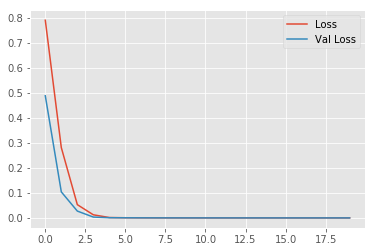

In [13]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = 6,4

In [14]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(166,1,20,1))

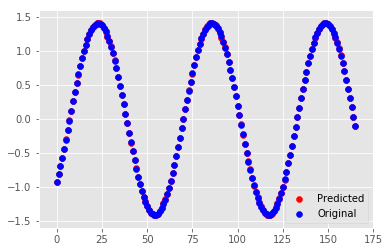

In [15]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

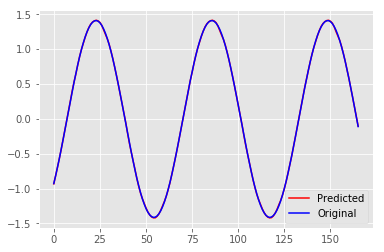

In [16]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [17]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, 1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 1, 20, 1) Y_test.Shape: (150,)


In [18]:
result_01 = model.predict(X_test).flatten()

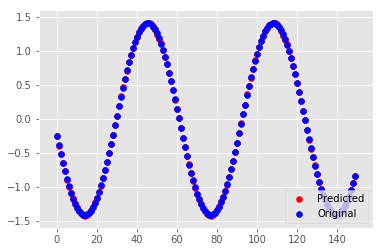

In [19]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

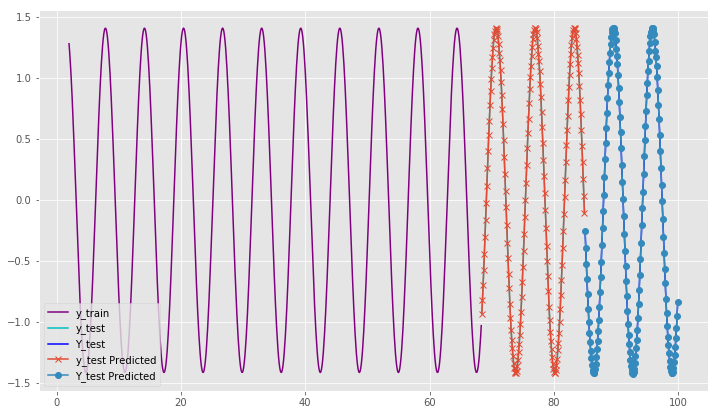

In [21]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test (with scaled values)
# x has 1000 values, which is divided into two ways x[0:850] for (x_train,x_test) and x[850:1000] for X_test
# 20 is the value to look back for LSTM therefore x[20:850] or x[20:-150], 830 total values .... ""
# (80% of 830) 830*0.8 = 664 is x_train .... x[20:850][:664]
# (20% of 830) 830*0.2 = 166 is x_test  .... x[20:850][664:]
# x[850:] 150 values for X_test, these values are un-trained with LSTM model 

x = 0.1*np.arange(0, 1000)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

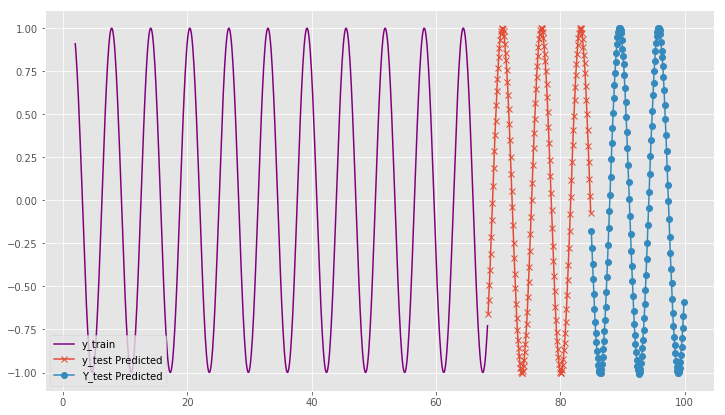

In [22]:
# Plotting y_train, predicted y_test and predicted Y_test (with original values)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(x[20:-150][664:], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(x[850:], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7